In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants


# Temperatura del Universo

### Radiación cósmica de fondo de microondas.

La [radiación cósmica del fondo de microondas](https://es.wikipedia.org/wiki/Radiación_de_fondo_de_microondas)(RCF) es radiación producida en etapas muy tempranas del Universo, ésta es la primera radiación que es libre de viajar a traves del espacio-tiempo. Fué medida por primera vez en los años 60's y a partir de entonces ha sido medida cada vez con mayor precisión, cómo se puede apreciar en la imagen que muestra el detalle observado por diferentes instrumentos. 

In [2]:
###

![CMB](./cmb.jpg)

El espectro de radiación medido en diferentes direcciones del cielo es muy bien descrita por un espectro conocido como espectro de cuerpo negro. 

Dicho espectro depende solamente de la temperatura asociada a la fuente que produce dicha radiación. En el caso de la RCF, dicha radiación se produce en un época muy temprana del Universo, sin embargo la longitud de onda de la radiación ha cambiado debido a la expansión del Universo. Así que el espectro de radiación observado con nuestros instrumentos a día de hoy, nos da información de cuál es la temperatura asociada a está radiación. 



Así que con los datos medidos podremos determinar cual es la ¡temperatura del Universo!. Para esto usaremos datos obtenidos con el instrumento FIRAS. 

El Objetivo de este ejercicio es obtener una gráfica similar a la mostrada en la figura (ignora las lineas negra, azul, roja y punteada), donde se muestran los datos obtenidos en un experimento, y una curva teórica. 



![fig1.png](./fig1.png)

Empecemos por hacer un gráfico de los datos, los cuales extraeremos del archivo llamado IRCF.txt.

In [3]:
data=np.loadtxt("IRCF.txt").T

(0.0, 420.0)

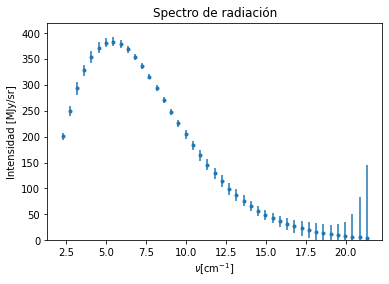

In [4]:
plt.errorbar(data[0],data[1],data[3]/2,fmt='.')
plt.ylabel("Intensidad [MJy/sr]")
plt.xlabel(r"$\nu [{\rm cm}^{-1}$]")
plt.title("Spectro de radiación")
plt.ylim(0,420)


La intensidad de radiación para un espectro de cuerpo negro está dado por la ecuación: 

$I(\nu,T)=2*\frac{h \nu^3}{c^2}\frac{1}{\exp^{h\nu/kT}-1}$

donde $\nu$ es la frecuencia, $T$ la temperatura, y  h, k, c son las constantes de Planck, Boltzmann y la rapidez de la luz, respectivamente. Define una función que calcule la intensidad para un valor dado de la temperatura y la frecuencia. 

In [5]:
print(constants.value("speed of light in vacuum"),constants.unit("speed of light in vacuum"))
print(constants.value(u"Planck constant"),constants.unit(u"Planck constant"))
print(constants.value(u"Planck constant"),constants.unit(u"Boltzmann constant"))

299792458.0 m s^-1
6.62607015e-34 J Hz^-1
6.62607015e-34 J K^-1


In [6]:
def Intensity(nu,T):    
    """Define las operaciones necesarias para calcular 
    la intensidad en unidades del SI
    
    nu= es el arreglo de frecuencas
    T= Temperatura en Kelvin
    """
    h=constants.value(u"Planck constant") #Cambiar por valores correctos de las constantes o usar la libreria de constantes...  
    c=constants.value(u"speed of light in vacuum")
    k=constants.value(u"Boltzmann constant")
    nu=nu*c*100 #dado que la frecuencia está en cm^-1 usamos la constante de la velocidad de la luz para cambiar a s-1, el factor 100 es porque c está dada en m/s
    fact=h*nu/(k*T)
    intensity=1./(np.exp(fact)-1)
    intensity*=2*h*nu**3/c**2
    return intensity

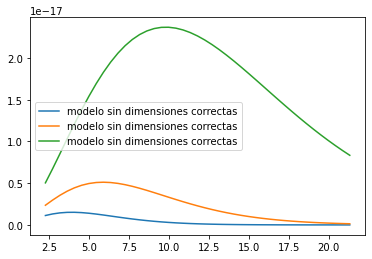

In [7]:
#plt.errorbar(data[0],data[1],data[3]/2,fmt='.')
plt.plot(data[0],Intensity(data[0],2),label="modelo sin dimensiones correctas")
plt.plot(data[0],Intensity(data[0],3),label="modelo sin dimensiones correctas")
plt.plot(data[0],Intensity(data[0],5),label="modelo sin dimensiones correctas")


plt.legend()

Dado que los datos que tenemos reportan la Intesindad en unidades $[Jy/sr]$ ([Jy=Jansky](https://en.wikipedia.org/wiki/Jansky), [sr=steradian](https://es.wikipedia.org/wiki/Estereorradián)) y no en el sistema internacional de unidades, por lo que será necesario hacer una transformación de unidades.

In [8]:
def SI_to_Jansky(value_SI):
    """ Define las operaciones 
    necesarias para realizar la transfomación de 
    """
    value_Jy=value_SI/1e-26
    return value_Jy

Bien, ahora que tienes una función con la que calcular la intensidad, puedes graficar un modelo, junto con los datos para intentar determinar qué valor de temperatura es el que mejor se ajusta a los datos. 

In [9]:
def Intensity_MJy(nu,T):
    """ Define las operaciones 
    necesarias para calcular la intensidad en unidades de Jy/sr.
    
    nu: frecuencia en cm^-1
    T: Temperatura en K
    """
    tmp=Intensity(nu,T)
    value_Mjy=SI_to_Jansky(tmp)/1e6
    
    return value_Mjy

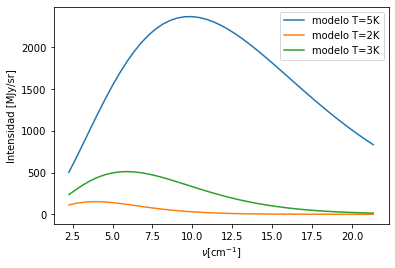

In [10]:
#Grafica del modelo y los datos para valores de prueba de la temperatura.
T_test=5 # en Kelvin
#plt.errorbar(data[0],data[1],data[3]/2,fmt='o',label="Datos")
plt.plot(data[0],Intensity_MJy(data[0],T_test),label="modelo T=5K")
plt.plot(data[0],Intensity_MJy(data[0],2),label="modelo T=2K")
plt.plot(data[0],Intensity_MJy(data[0],3),label="modelo T=3K")



plt.ylabel("Intensidad [MJy/sr]")
plt.xlabel(r"$\nu [{\rm cm}^{-1}$]")
#plt.ylim(0,420)
plt.legend()

Un método simple muy utilizado para el ajuste de modelos, es decir encontrar el parámetro(s) que hacen que un modelo se ajuste bien a los datos, es el llamado minimización de $\chi^2$. Este método consiste en definir la función  $\chi^2$, que corresponde a una suma de las distancias entre los datos medidos y la predicción con el modelo, pesadas por la incertidumbre asociada a la medición. Una vez definida la función, se busca para qué valor del parámetro se tiene que el $\chi^2$ es mínimo. La función $\chi^2$ está dada por: 

$\chi^2=\frac{1}{2}\sum_i \frac{(y^{obs}_i(x^{obs}_i)-y^{model}_{i}(x^{obs}_i,\vec{\theta}))^2}{{\sigma^{obs}_{i}(x^{obs}_i)}^2}$

donde el subíndice i, indica el punto i-ésimo, y las etiquetas $obs$ y $model$, indican si nos referimos a la observación o al modelo. Las variables $x$ , $y$ representan las variables independiente y dependiente, en el problema en cuestión. Para nuestro caso la frecuencia y la intensidad, respectivamente. Finalmente el vector $\theta$ representa el conjunto de parámetros libres que se requieren para el modelo (no constantes), en este caso en particular, la temperatura T. En las variables de nuestro problema, la función chi^2 toma la forma

$\chi^2=\frac{1}{2}\sum_i \frac{(Inensity^{obs}_i(frequency^{obs}_i)-Intensity^{model}_{i}(frequency^{obs}_i,T))^2}{{\sigma^{obs}_{i}(frequency^{obs}_i)}^2}$



In [22]:
#Define una función que calcule $\chi^2$ cómo función del parámetro libre, la temperatura
#La definiremos de forma general, para que pueda ser usada en otros casos.

def chi2(Temperatura):
    chi2=0
    for i in range(len(data[1])):
        diff=data[1][i]-Intensity_MJy(data[0][i],Temperatura)
        chi2_i=diff**2/data[3][i]**2
        chi2+=chi2_i
    return 0.5*chi2

##misma función de arriba pero usando la forma compacta de python. 
def chi2_op(Temperatura): 
    diff=data[1]-Intensity_MJy(data[0],Temperatura)
    chi2_i=diff**2/data[3]**2
    chi2=np.sum(chi2_i)
    return 0.5*chi2

# veamos algunos valores de la función chi2...

In [23]:
chi2(5),chi2_op(5)

(194053.85959027486, 194053.8595902748)

In [24]:
chi2(3),chi2_op(3)

(828.9701860362933, 828.9701860362932)

In [25]:
chi2(2),chi2_op(2)

(2258.5614328211614, 2258.561432821162)

In [26]:
from scipy.optimize import minimize

In [27]:
chi2_min=minimize(chi2,5,method='L-BFGS-B',bounds=[(1,10)])

In [28]:
chi2_min

      fun: array([2.25482112e-05])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.215539e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 34
      nit: 6
     njev: 17
   status: 0
  success: True
        x: array([2.72501533])

In [29]:
chi2_min.x

array([2.72501533])

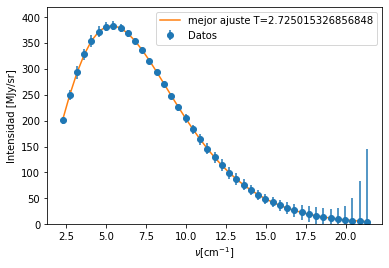

In [30]:
T_test=5 # en Kelvin
plt.errorbar(data[0],data[1],data[3]/2,fmt='o',label="Datos")
plt.plot(data[0],Intensity_MJy(data[0],chi2_min.x),label=f"mejor ajuste T={chi2_min.x[0]}")



plt.ylabel("Intensidad [MJy/sr]")
plt.xlabel(r"$\nu [{\rm cm}^{-1}$]")
plt.ylim(0,420)
plt.legend()

In [31]:
#Realiza minimización de la función $\chi^2$ cómo función del parámetro libre.
#Se puede utilizar la función scipy.optimize.minimize (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), o bien evaluar la función en un arreglo de temperatura
#que permita encontrar el valor de la temperatura que minimiza la función chisq


Ahora que ya tienes el resultado de la minimización del $\chi^2$ ya sabes que valor de la temperatura es el que mejor describe los datos. Utilízalo para hacer una gráfica que muestre los datos proporcionados, y el modelo que mejor los describe. En el panel inferior de la gráfica calcula la diferencia entre la observación y el modelo, lo que llamamos residuo. 

# Resultados

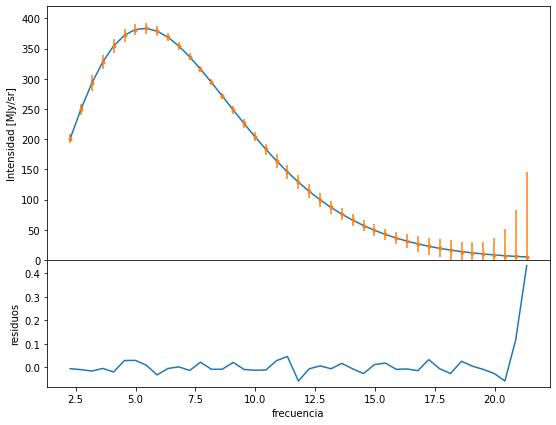

In [32]:
T_min=chi2_min.x
modelo_min=Intensity_MJy(data[0],T_min)

fig, axs = plt.subplots(nrows=2,ncols= 1,figsize=(9, 7),sharex=True,
                       gridspec_kw={'height_ratios': [2, 1]},)
##Añade las lineas necesarias para completar el gráfico. 
axs[0].plot(data[0],modelo_min)
axs[0].errorbar(data[0],data[1],data[3]/2,fmt='.')
axs[0].set_ylim(0,420)
axs[0].set_ylabel("Intensidad [MJy/sr]")
##Añade las lineas necesarias para completar el gráfico. 
axs[1].plot(data[0],modelo_min-data[1])
axs[1].set_ylabel("residuos")
axs[1].set_xlabel("frecuencia")
fig.subplots_adjust(hspace=0)
